In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from spatial_distribution_utilities import radial_disribution, structure_factor_from_g_r, psi_k
from spheres_api import simulate_spheres

In [2]:
plt.style.use("dark_background")

In [3]:
df1 = simulate_spheres(eventspercycle = 20,
                     N = 1000,
                     initalpf = 0.01,
                     maxpf = 0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.)

log: write input file
run simulation
Reading input from file spheres/input
   eventspercycle : 20
   N : 1000
   initialpf : 0.01
   maxpf : 0.05
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : write.dat
   datafile : stats.dat
ngrids = 125
DIM = 2
Creating new positions of spheres
CompletedProcess(args=['./spheres/a.out', 'spheres/input'], returncode=0)
obtaining results


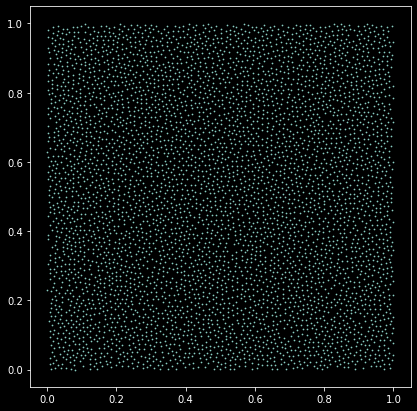

In [4]:
fig, ax = plt.subplots()

fig.set_size_inches(7,7)
ax.scatter(df1.x, df1.y, s=0.5)
ax.set_aspect("equal")

Log: Calculating distances


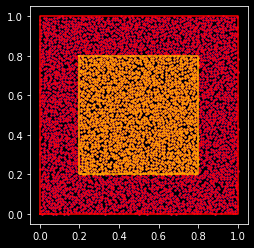

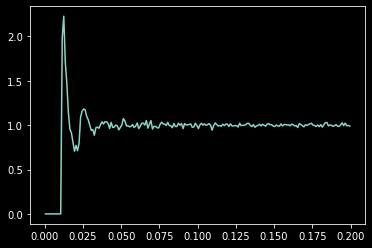

In [5]:
rdf_data = radial_disribution(df1,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot_points=True)

In [6]:
rdf_data.keys()

dict_keys(['r', 'rd', 'bin_edges', 'raw_bins', 'N', 'density'])

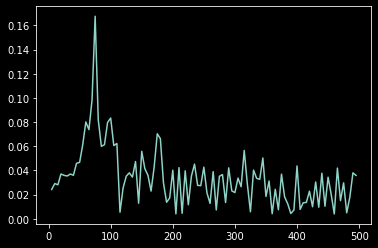

In [7]:
from scipy.fft import fft, fftfreq, dst

r_vals = rdf_data["r"]
rdf_vals = rdf_data["rd"]
N = len(r_vals)

maxR = 0.2

T = r_vals[1] - r_vals[0]
# yf = np.absolute(fft((rdf_vals - 1)))[:N//2]
# yf = (dst(rdf_vals - 1))[:N//2]

yf = np.absolute(fft(np.multiply(r_vals, (rdf_vals - 1)))[:N//2])
# yf = np.absolute(dst(rdf_vals - 1))[:N//2]

xf = fftfreq(N, T)[:N//2]
plt.plot(xf[1:], yf[1:])

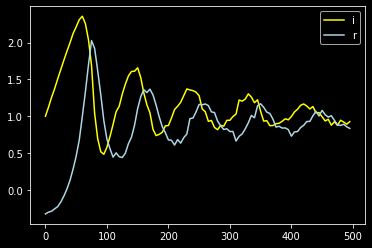

In [8]:
from scipy.fft import rfft
yf1 = 1 + (rfft((rdf_vals - 1) / (2 * np.pi)))
# yf1 = 1 + (rfft((rdf_vals - 1)))
plt.plot(xf[:100], 1 + np.imag(yf1[:100]), label="i", color="yellow")
plt.plot(xf[:100], np.real(yf1[:100]), label="r", color="lightblue")
plt.legend()

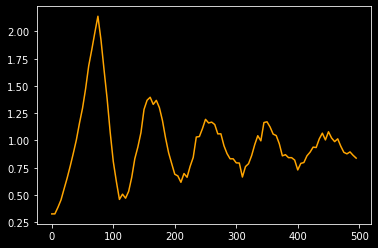

In [9]:
from scipy.fft import rfft
# yfa = np.absolute(rfft((rdf_vals - 1) / (2 * np.pi)) + 1)
yfa = np.absolute(yf1)
plt.plot(xf[:100], yfa[:100], color="orange")

<class 'numpy.ndarray'>


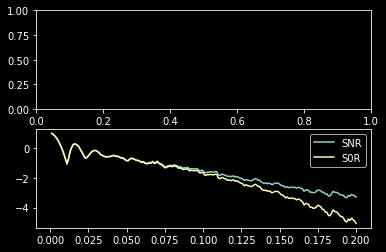

/home/pt/PROJECTS/LEJE/source/licenv/lib/python3.8/site-packages/matplotlib/image.py:443: RuntimeWarning: overflow encountered in double_scalars
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/pt/PROJECTS/LEJE/source/licenv/lib/python3.8/site-packages/matplotlib/image.py:446: RuntimeWarning: invalid value encountered in double_scalars
  newmin = vmid - dv * fact
/home/pt/PROJECTS/LEJE/source/licenv/lib/python3.8/site-packages/matplotlib/image.py:479: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


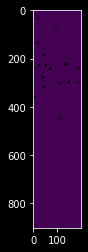

In [10]:
sf = structure_factor_from_g_r(rdf_data["bin_edges"],
                               rdf_data["raw_bins"],
                               rdf_data["density"],
                               rdf_data["N"])

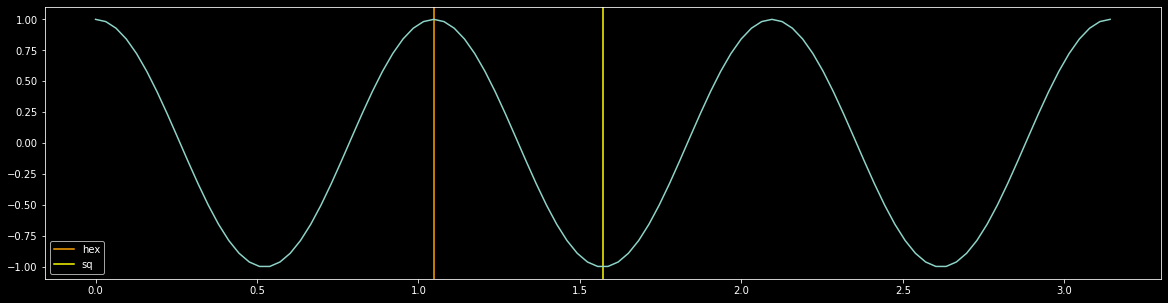

In [11]:
def psi(x):
    return np.cos(6 * x)

X = np.linspace(0,np.pi,100)

plt.figure(figsize=(20,5))
# plt.axvlines([np.pi/6, np.pi/4])
plt.axvline(2 * np.pi/6, label="hex", color="orange")
plt.axvline(2 * np.pi/4, label="sq", color="yellow")
plt.plot(X,psi(X))
plt.legend()

In [12]:
hist_edges, hist_bins = np.histogram(df1.x)
type(hist_edges)

numpy.ndarray

In [13]:
positions = df1[['x','y']].to_numpy()

In [14]:
psik, angles = psi_k(positions,k=6)

In [15]:
psik

[0.8853225320178575,
 0.4631074026110895,
 -0.8991522359036654,
 0.5057411950177688,
 -0.21407301704546666,
 -0.0021110898828647583,
 -0.9995305922641287,
 0.8488732502072521,
 -0.6437218352925126,
 -0.028526332742729806,
 -0.5303873180621469,
 0.7666168123886924,
 -0.8322804374862255,
 0.6199747927329105,
 -0.9509517335324659,
 0.9527099966926603,
 -0.5362331110886254,
 0.8002635055396021,
 0.860799054059656,
 0.21808084458666974,
 -0.7673714606384283,
 0.5801972563160275,
 0.9747505722127057,
 0.504334600020262,
 0.07701747821554979,
 -0.8911741061505966,
 -0.9406959356801696,
 0.38367797795010683,
 -0.41069324198068297,
 0.6844188150111479,
 0.9412236854062165,
 0.9440344540021419,
 0.9898619251120092,
 0.9834602892026988,
 0.12218647439700671,
 0.999964551342759,
 0.9796579475557868,
 0.986836851032645,
 -0.22024815208380985,
 0.9813128962766319,
 0.9881635395422109,
 -0.21202712698007045,
 0.9992154605831663,
 -0.020021017348451225,
 -0.05960120161244078,
 -0.506835931541548,
 -0.

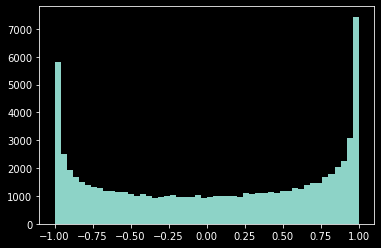

In [20]:
coshist = plt.hist(psik, bins=50)

In [25]:
np.average(psik)

0.05391701420893389

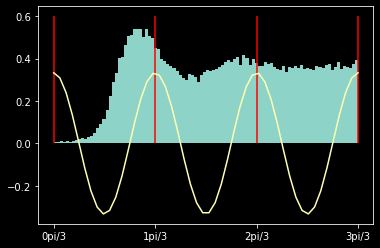

In [17]:
hist = plt.hist(angles, bins=100, density=True)
X = np.linspace(0,np.pi)
plt.plot(X, np.cos(6 * X)/3)
plt.xticks(ticks = [i * np.pi / 3 for i in range(4)], labels=[f"{i}pi/3" for i in range(4)])
plt.vlines([i * np.pi / 3 for i in range(4)], 0, 0.6, color="red")

In [16]:
len(df1)

5000